In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML


In [150]:
# adjust jupyter notebook viz
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 15]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [151]:
link = 'https://raw.githubusercontent.com/franciscofijamo/mambas_analysis/main/results.csv'
df = pd.read_csv(link, index_col=0)

In [152]:
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1873-03-08,England,Scotland,4,2,Friendly,London,England,False
1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1875-03-06,England,Scotland,2,2,Friendly,London,England,False
1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [153]:
df_home = df[df['home_team'] == 'Mozambique'].copy()

In [154]:
df_away = df[df['away_team'] == 'Mozambique'].copy()

In [155]:
# Convert to date time

# df_home['date'] = pd.to_datetime(df_home['date'])
# df_away['date'] = pd.to_datetime(df_away['date'])


# 

In [156]:
df_home.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1975-06-29,Mozambique,Zambia,2,1,Friendly,Maputo,Mozambique,False
1975-06-29,Mozambique,Tanzania,2,1,Friendly,Maputo,Mozambique,False
1977-05-30,Mozambique,Cuba,0,2,Friendly,Maputo,Mozambique,False
1979-05-19,Mozambique,Zimbabwe,0,6,Friendly,Maputo,Mozambique,False
1980-04-21,Mozambique,Tanzania,0,2,Friendly,Bulawayo,Zimbabwe,True


In [157]:
df_home.isna().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [158]:
def who_win(data):
  
  con=[(data['home_score']==data['away_score']),(data['home_score']>data['away_score']),(data['home_score']<data['away_score'])]
  val=[0,1,2]
  val2=['empate',data['home_team'],data['away_team']]
  data['result']=np.select(con,val)
  data['resultado']=np.select(con,val2)


In [159]:
# create column with who win the plays
who_win(df_away)
who_win(df_home)

In [160]:
df_away.tail(15)


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,resultado
date,,,,,,,,,,
2016-06-04,Rwanda,Mozambique,2,3,African Cup of Nations qualification,Kigali,Rwanda,False,2,Mozambique
2016-06-19,DR Congo,Mozambique,1,0,COSAFA Cup,Windhoek,Namibia,True,1,DR Congo
2016-06-21,Namibia,Mozambique,3,0,COSAFA Cup,Windhoek,Namibia,False,1,Namibia
2016-10-09,Togo,Mozambique,2,0,Friendly,Lomé,Togo,False,1,Togo
2016-11-12,Kenya,Mozambique,1,0,Friendly,Nairobi,Kenya,False,1,Kenya
2017-06-10,Zambia,Mozambique,0,1,African Cup of Nations qualification,Ndola,Zambia,False,2,Mozambique
2017-06-28,Seychelles,Mozambique,1,2,COSAFA Cup,Rustenburg,South Africa,True,2,Mozambique
2017-07-16,Madagascar,Mozambique,2,2,African Nations Championship,Antananarivo,Madagascar,False,0,empate
2018-05-27,Madagascar,Mozambique,2,1,COSAFA Cup,Polokwane,South Africa,True,1,Madagascar


In [161]:
#Total de  Jogos em casa

print("TOTAL DE PAERTIDAS EM CASA ATE OUTUBRO DE 2020: {}".format(df_home.shape[0]))

TOTAL DE PAERTIDAS EM CASA ATE OUTUBRO DE 2020: 145


In [162]:
#Total de  Jogos fora de casa

print("TOTAL DE PAERTIDAS FORA DE CASA, ATE NOV DE 2019: {}".format(df_away.shape[0]))

TOTAL DE PAERTIDAS FORA DE CASA, ATE NOV DE 2019: 160


In [163]:
# JOGOS GANHOS EM CASA

df_home['resultado'].value_counts()

#Jogos ganhos em casa: 65
#Jogos empatados em casa: 37

Mozambique      65
empate          37
Zimbabwe         9
Zambia           5
Angola           4
Malawi           3
Botswana         2
Senegal          2
Madagascar       2
Cuba             1
Congo            1
Cameroon         1
Ghana            1
South Africa     1
Tanzania         1
Nigeria          1
Mali             1
Guinea           1
Rwanda           1
Namibia          1
Egypt            1
DR Congo         1
Ivory Coast      1
Portugal         1
Lesotho          1
Name: resultado, dtype: int64

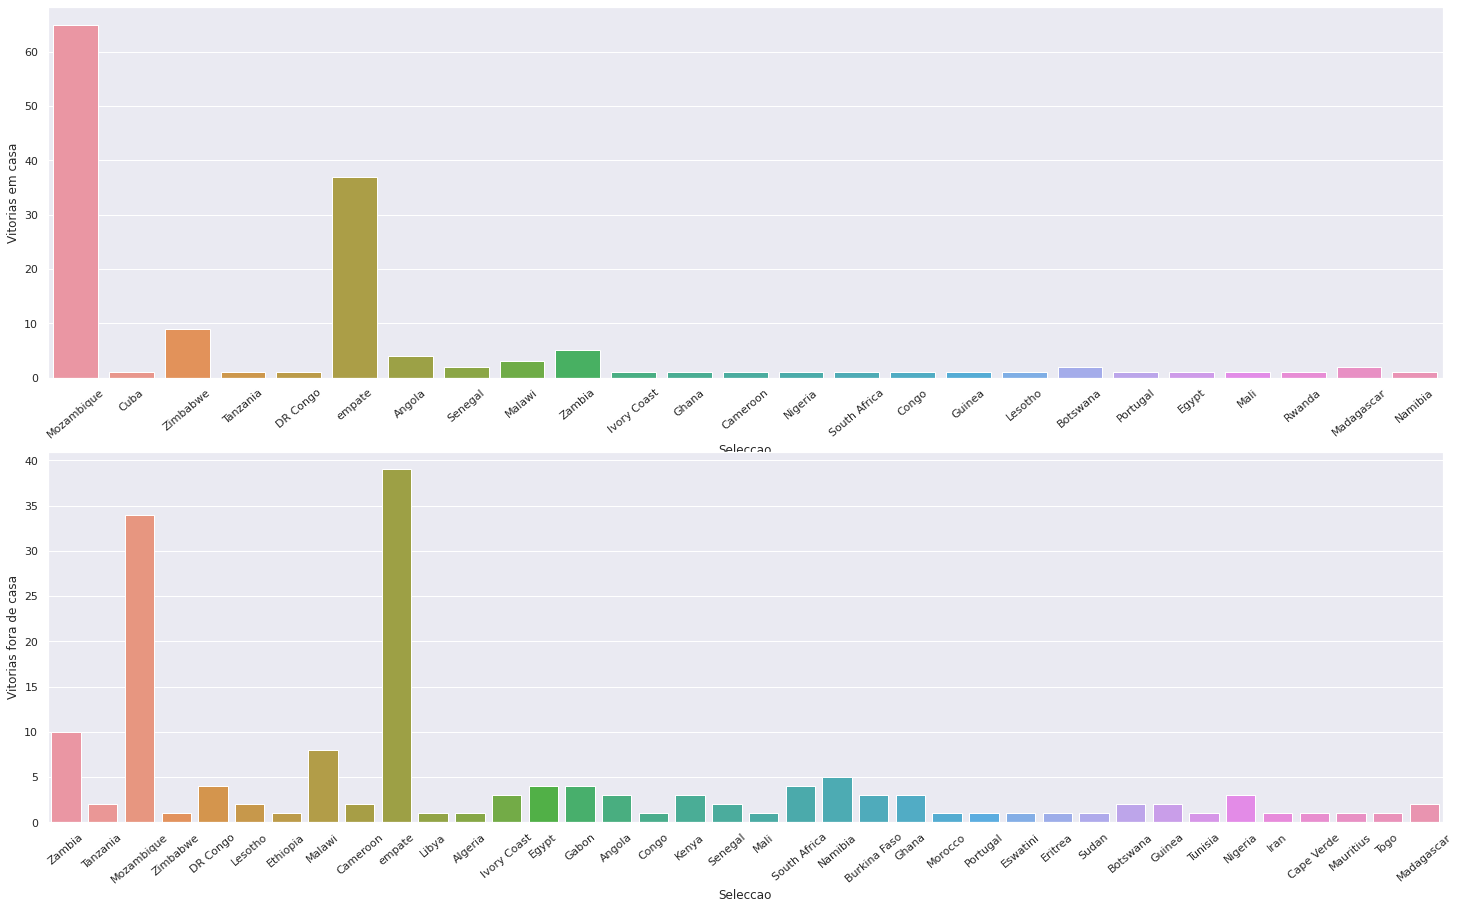

In [164]:
 plt.subplot(2,1,1)

 # Jogos ganhos em casa
sns.countplot(x="resultado", data=df_home)
plt.ylabel('Vitorias em casa')
plt.xlabel('Seleccao')
plt.xticks( rotation = 40);


 plt.subplot(2,1,2)
 # Jogos ganhos fora de  casa
sns.countplot(x="resultado", data=df_away)
plt.ylabel('Vitorias fora de casa')
plt.xlabel('Seleccao')
plt.xticks( rotation = 40);


In [ ]:
df_home['resultado'].sample(10)